In [1]:
from pandas import Series
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [2]:
train = pd.read_csv('train.csv')
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

<AxesSubplot:>

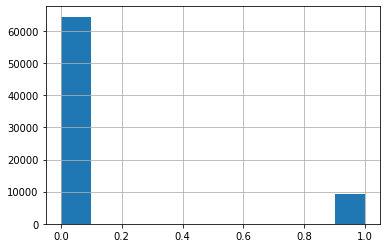

In [4]:
train.default.hist()

In [5]:
# заполняем пропуски модой
train.education = train.education.fillna(train.education.mode()[0])

In [6]:
# преобразовываем признак app_date в дату 
train.app_date = train.app_date.apply(lambda x: datetime.strptime(x, '%d%b%Y'))

In [7]:
# добавляем новый признак(количество дней от app_date до сегодняшнего дня)
train['days_from_app'] = train.app_date.apply(lambda x: (datetime.today() - x).days)
train['days_from_app'] = train.days_from_app.apply(lambda x: int(str(x).split()[0]))

0        2646
1        2607
2        2646
3        2655
4        2570
         ... 
73794    2615
73795    2595
73796    2566
73797    2674
73798    2655
Name: days_from_app, Length: 73799, dtype: int64

In [8]:
train.age = train.age.apply(lambda x: np.log(x+1))
train.income = train.income.apply(lambda x: np.log(x+1))
train.days_from_app = train.days_from_app.apply(lambda x: np.log(x))

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


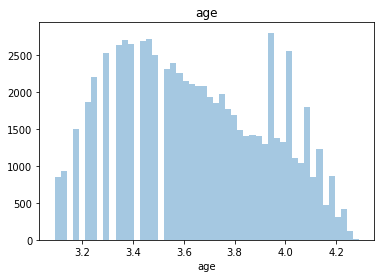

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


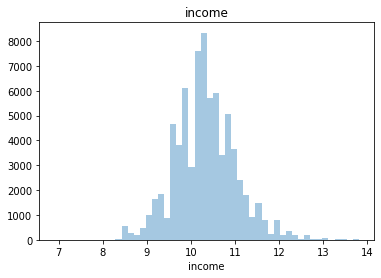

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


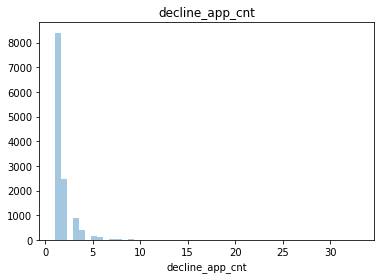

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


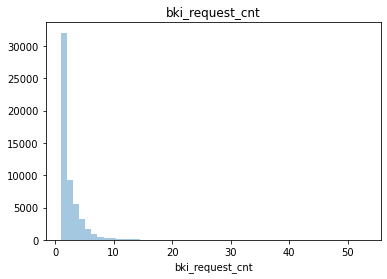

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


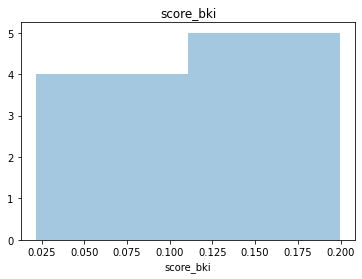

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


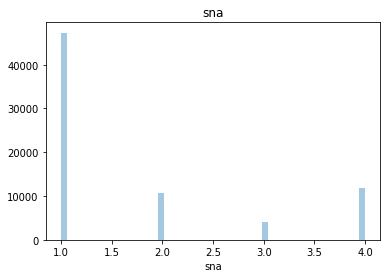

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


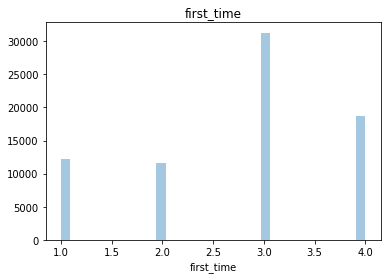

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


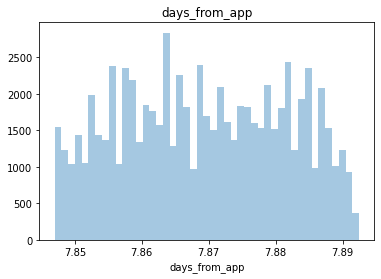

In [9]:
num_cols = ['age', 'income', 'decline_app_cnt', 'bki_request_cnt', 'score_bki', 'sna', 'first_time', 'days_from_app']
for i in num_cols:
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='default', ylabel='age'>

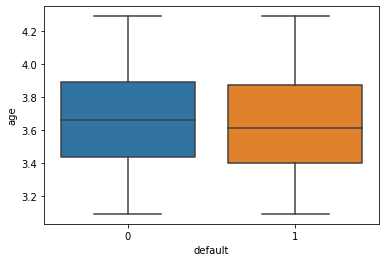

In [10]:
sns.boxplot(x='default', y='age', data=train)

<AxesSubplot:xlabel='default', ylabel='income'>

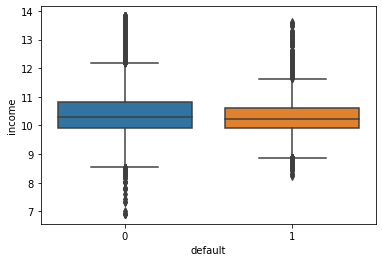

In [11]:
sns.boxplot(x='default', y='income', data=train)

<AxesSubplot:xlabel='default', ylabel='decline_app_cnt'>

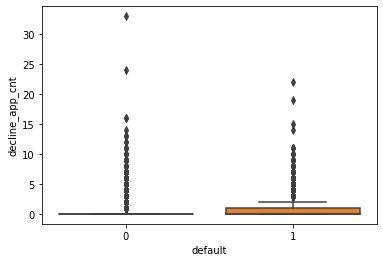

In [12]:
sns.boxplot(x='default', y='decline_app_cnt', data=train)

<AxesSubplot:xlabel='default', ylabel='bki_request_cnt'>

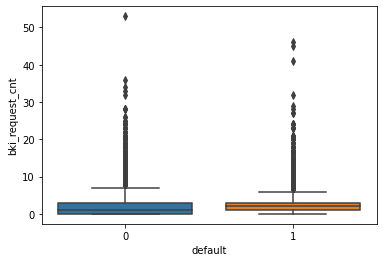

In [13]:
sns.boxplot(x='default', y='bki_request_cnt', data=train)

## оценка корреляции

<AxesSubplot:>

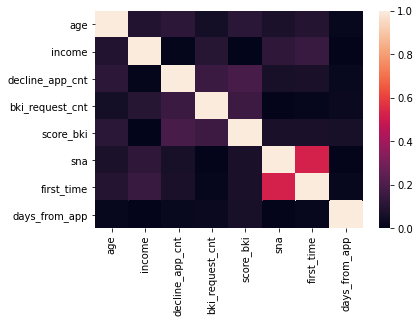

In [14]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1)

# Значимость непрерывных переменных

Для оценки значимости числовых переменных будем использовать функцию f_classif из библиотеки sklearn. 

Возможности модуля sklearn.feature_selection могут быть использованы не только для выбора важных признаков, но и для уменьшения размерности, улучшения предсказательной силы моделей, либо для повышения их производительности на очень многомерных наборах данных.

В основе метода оценки значимости переменных лежит однофакторный дисперсионный анализ (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t). 

В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей линейной модели.

<AxesSubplot:>

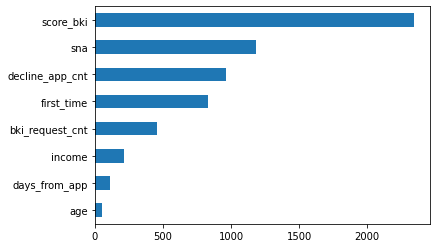

In [15]:
imp_num = pd.Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [16]:
# удаляем признак first_time, так как он коррелирует с другим признаком sna
num_cols.remove('first_time')

Метод fit этого класса находит все уникальные значения и строит таблицу для соответствия каждой категории некоторому числу, а метод transform непосредственно преобразует значения в числа. После fit у label_encoder будет доступно поле classes_, содержащее все уникальные значения. Можно их пронумеровать и убедиться, что преобразование выполнено верно.

In [17]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(train['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [18]:
bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    
# убедимся в преобразовании    
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,days_from_app
0,25905,2014-02-01,SCH,1,4.143135,1,1,0,0,-2.008753,1,50,1,2,9.798183,4,1,0,0,7.880804
1,63161,2014-03-12,SCH,0,4.094345,0,0,0,0,-1.532276,3,50,2,3,9.852247,4,1,0,0,7.865955
2,25887,2014-02-01,SCH,1,3.258097,1,0,2,0,-1.408142,1,80,1,2,10.308986,1,4,1,0,7.880804
3,16222,2014-01-23,SCH,0,3.988984,0,0,0,0,-2.057471,2,50,2,3,9.210440,1,3,0,0,7.884200
4,101655,2014-04-18,GRD,1,3.891820,0,0,0,1,-1.244723,1,60,2,3,10.308986,1,4,1,0,7.851661


# Значимость категориальных признаков
Для оценки значимости категориальных и бинарных переменных будем использовать функцию mutual_info_classif из библиотеки sklearn. Данная функция опирается на непараметрические методы, основанные на оценке энтропии в группах категориальных переменных.

In [19]:
train.education.unique()

array(['SCH', 'GRD', 'UGR', 'PGR', 'ACD'], dtype=object)

In [20]:
edu_dict = {'SCH':0, 'GRD':1, 'UGR':2, 'PGR':3, 'ACD':4}
train.education = train.education.replace(to_replace=edu_dict)

<AxesSubplot:>

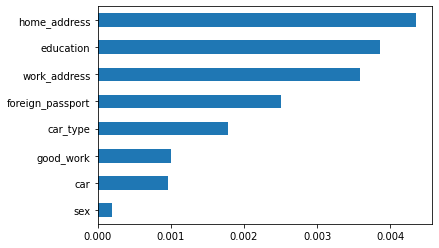

In [21]:
cat_cols = ['education', 'home_address', 'work_address']
imp_cat = Series(mutual_info_classif(train[bin_cols + cat_cols], train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

# OneHotEncoding

In [22]:
X_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)

In [23]:
X_cat.shape

(73799, 11)

In [24]:
# Стандартизация числовых переменных

X_num = StandardScaler().fit_transform(train[num_cols].values)

In [25]:
# Объединяем

X = np.hstack([X_num, train[bin_cols].values, X_cat])
Y = train['default'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


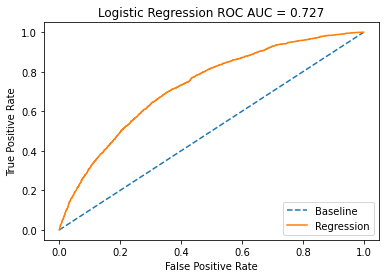

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Регуляризация и гиперпараметры

In [28]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, 

C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit fai

C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit fai

C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit fai

C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.87194903        nan 0.87194903        nan 0.87194903
        nan 0.87194903        nan 0.87194903        nan 0.87194903
        nan 0.87194903        nan 0.87194903        nan 0.87194903
        nan 0.87194903]
  warnings.warn(


Лучшее Penalty: l2
Лучшее C: 1.0


C:\Users\Администратор\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# преобразуем тестовую выборку
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [31]:
# заполняем пропуски модой
test.education = test.education.fillna(train.education.mode()[0])

# преобразовываем признак app_date в дату 
test.app_date = test.app_date.apply(lambda x: datetime.strptime(x, '%d%b%Y'))

# добавляем новый признак(количество дней от app_date до сегодняшнего дня)
test['days_from_app'] = test.app_date.apply(lambda x: (datetime.today() - x).days)
test['days_from_app'] = test.days_from_app.apply(lambda x: int(str(x).split()[0]))

test.age = test.age.apply(lambda x: np.log(x+1))
test.income = test.income.apply(lambda x: np.log(x+1))
test.days_from_app = test.days_from_app.apply(lambda x: np.log(x))

label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(test['sex']))

for column in bin_cols:
    test[column] = label_encoder.fit_transform(test[column])

# убедимся в преобразовании    
test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,days_from_app
0,74835,2014-03-22,GRD,1,3.401197,1,1,0,0,-2.271884,3,50,1,2,10.819798,1,4,0,7.862112
1,17527,2014-01-24,SCH,0,3.688879,0,0,5,0,-1.504999,2,50,1,2,8.517393,4,3,0,7.883823
2,75683,2014-03-23,UGR,1,3.931826,1,1,0,0,-1.691339,1,50,1,2,10.308986,1,3,1,7.861727
3,26883,2014-02-03,SCH,1,4.043051,0,0,0,0,-2.374182,1,40,1,2,9.741027,1,3,0,7.880048
4,28862,2014-02-04,GRD,0,3.663562,0,0,0,0,-2.487502,0,80,2,3,11.695255,1,3,0,7.879670


In [32]:
test.education = test.education.replace(to_replace=edu_dict)

X_cat = OneHotEncoder(sparse = False).fit_transform(test[cat_cols].values)
X_num = StandardScaler().fit_transform(test[num_cols].values)

# Объединяем
X = np.hstack([X_num, test[bin_cols].values, X_cat])

probs = best_model.predict_proba(X)

array([[0.95912029, 0.04087971],
       [0.55488095, 0.44511905],
       [0.95056259, 0.04943741],
       ...,
       [0.72987374, 0.27012626],
       [0.73619442, 0.26380558],
       [0.75635994, 0.24364006]])

In [35]:
# создаем итоговый датафрейм
submission = test[['client_id']]
submission['default'] = pd.Series(probs[:,1])

,client_id
0,74835
1,17527
2,75683
3,26883
4,28862
...,...
36344,83775
36345,106254
36346,81852
36347,1971


In [37]:
submission.to_csv('submission.csv', index=False)